In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.metrics import classification_report

In [2]:
model = keras.models.load_model("breast-cancer-classifier.keras")

In [3]:
image_size = (50, 50)
batch_size = 512
class_names = ["idc", "non_idc"]

test_set = keras.preprocessing.image_dataset_from_directory(
    directory="../data/dataset/test",
    label_mode="binary",
    batch_size=batch_size,
    image_size=image_size,
    class_names=class_names
)

Found 15758 files belonging to 2 classes.


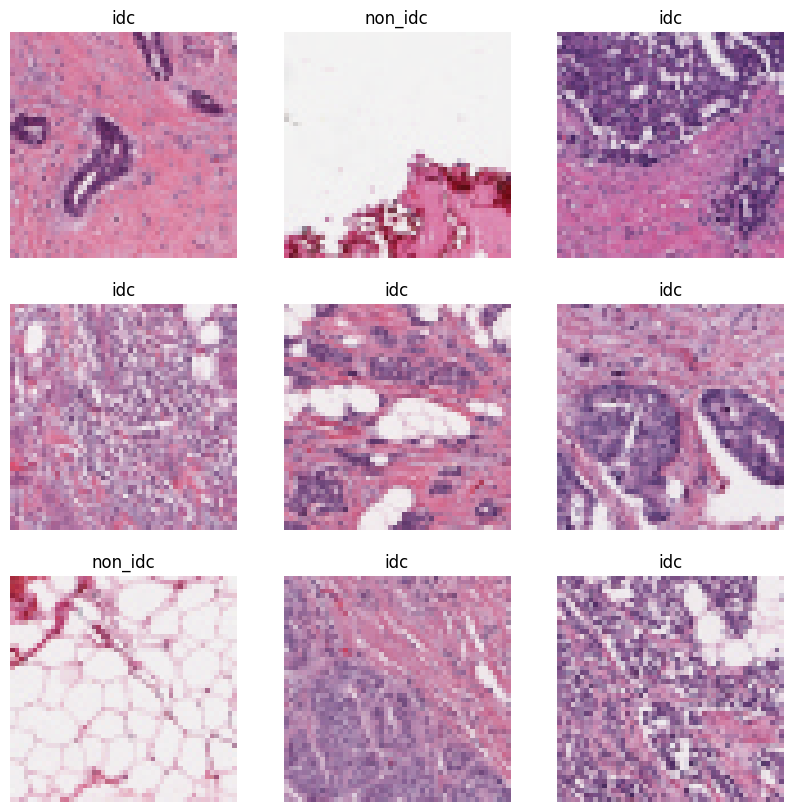

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in test_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(test_set.class_names[int(labels[i])])
        plt.axis("off")

In [5]:
model.evaluate(test_set)

31/31 [==============================] - 3s 102ms/step - loss: 0.3323 - accuracy: 0.8665


[0.33234304189682007, 0.8664805293083191]

In [6]:
y_pred = np.array([])
y_true = np.array([])

for x, y in test_set:
    y_pred = np.concatenate([y_pred, model.predict(x).flatten()])
    y_true = np.concatenate([y_true, y.numpy().flatten()])

y_pred = np.where(y_pred > 0.5, 1, 0)

13/13 [==============================] - 0s 7ms/step


In [7]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         idc       0.87      0.87      0.87      7879
     non_idc       0.87      0.87      0.87      7879

    accuracy                           0.87     15758
   macro avg       0.87      0.87      0.87     15758
weighted avg       0.87      0.87      0.87     15758
